In [1]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [2]:
# 네이버 리뷰 파일 불러오기

path_to_file = 'data/ratings_train.txt'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 150001
Example:
>> id	document	label
>> 3989148	약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.	1
>> 4805788	이 영화가 왜 이렇게 저평가 받는지 모르겠다	1
>> 8317483	백봉기 언제나오나요?	1
>> 9801316	아햏햏 아햏햏 아햏햏.	1


문장의 최단 길이: 8
문장의 최장 길이: 168
문장의 평균 길이: 45


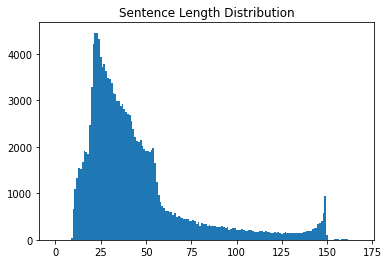

In [3]:
# 전체 문장의 최소/최대 길이 확인

min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [4]:
# 문장 길이가 10 이하인 문장 확인
def check_sentence_with_underlength(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) <= length:
            print(sen)
            count += 1
            
    print('\n')
    print(f"문장 길이 {length} 이하인 문장개수 {count}")

check_sentence_with_underlength(raw, 10)

304515	음	1
444938	k	1
20433	gg	0
132033	음	0
181912	!	1
359141	굿	1
216228	.	0
2172111		1
24994	ㅇㅇ	0
323254	시	1
104253	굿	1
2350	별로	0
669245	굿	1
864206	굿	1
6369843		1
684649	굿	1
420354	1	0
288847	굿	0
192388	굿	1
656578	굿	1
96210	강추	1
596948	굿	0
30570	10	1
58414	고전	0
11046	b	0
129589	g	1
81044	大作	1
15565	ㅡㅡ	0
6859	짱	1
417105	즐	0
298858	굿	1
697084	굳	1
200387	g	0
25038	ㅉㅉ	0
202066	음	0
1034280		0
461077	굿	1
200855	굿	1
168734	h	1
20438	굿!	1
371946	굳	1
5942978		0
76131	ㄱ	0
843536	.	0
101208	k	0
571771	즐	0
404477	a	1
1034283		0
363915	.	0


문장 길이 10 이하인 문장개수 49


In [5]:
# 문장 길이가 150 이상인 문장 확인
def check_sentence_with_uplength(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) >= length:
            print(sen)
            count += 1
            
    print('\n')
    print(f"문장 길이 {length} 이상인 문장개수 {count}")

check_sentence_with_uplength(raw, 150)

9837767	데너리스 타르 가르엔...나도 용의주인이 되고 싶다...누이랑,근친상간이나 하고 다닐지라도,소설 속에선 제일 멋진 놈이 자이메 라니스터였는데,드라마속에선,드래곤(용)이 제일 멋지네(웃음)감독님 토르-2 다크 월드는 말아 잡수셨을지라도,기본 선방은 했음	1
10261336	아~ 진짜 조금만 더 손 좀 보면 왠만한 상업 영화 못지 않게 퀄리티 쩔게 만들어 질 수 있었는데 아쉽네요 그래도 충분히 재미있었습니다 개인적으로 조금만 더 잔인하게 더 자극적으로 노출씬도 화끈하게 했더라면 어땠을까 하는 국산영화라 많이 아낀 듯 보임	1
7033414	평점조절위원회에서 나왔습니다(웃음)김혜선은 @내일이 오면@의 김순정,순정이 역할이 제일이다.팜므파탈로써,그 정도까지 잘해낼 줄은,정말 의외였어...연기20년 한사람에게 요즘 사극에서 벌어지고 있는,그녀에 대한 연기논란은 왠지 코미디의한장면 같음(웃음)	0
8555924	사실여부를 떠나,알고왔던 아더와 너무 매칭이 안돼더라.원탁기사중 실제 검술 최고수는 랜슬롯으로 알고 있는데,트리스탄보다 못하고,싸우는 검술은 마치 중국검술 흉내낸거 같은게;; 그리고 란슬롯이 실제는 쌍검였나?너무 매칭이 안대 하튼 ㅋ기네비어역도 미스.	0
6615814	진짜 이건 아님ㅋㅋㅋㅋㅋ액션영화좋아해서 액션영화만 다운받아서 꾸준히 본게 벌써 몇년인 사람임 근데 이건 진짴ㅋㅋㅋㅋㅋㅋ아무리 점수 잘 줘도 100점 만점에 10점?ㅡㅡ돈주고봤는데너무아깝다진짜ㅜㅜ그리고대체 왜 13구역 타이틀을 달고나왔는지 모르겠음 실망	0
10010400	영화'산업'이라고 하잖는가? 이딴식으로 홍보 해놓고 속여서 팔았다는 게 소비자 입장에서는 짜증난다. 그나마 다행은 아주 싸구려를 상급품으로 속여판 게 아니라는 점. 그래서 1점. 차라리 연상호 감독 작품 처럼 홍보가 됐다면, 그 비슷하게 만이라도 하지	0
7628876	화려한 색채때문에 눈이 아프지만 그 나름대로 화려연예계여자욕망에대해 표현해냈던거같다 보는내내 진짜 리리코심정가진 연옌들도 있을거같고..나를한번도보지못하

Data Size: 150001
문장의 최단 길이: 8
문장의 최장 길이: 168
문장의 평균 길이: 45


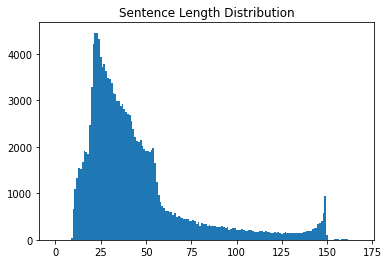

In [6]:
# 중복된 문장 제거(중복 문장 없음)
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

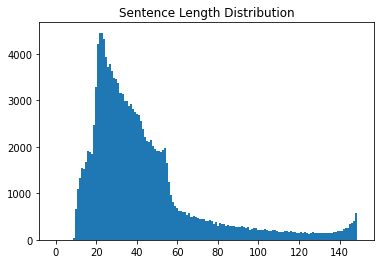

In [7]:
# 최소길이 10, 최대길이 150으로 선정

max_len = 150
min_len = 10

filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [8]:
import sentencepiece as spm

In [9]:
# ngram 모델로 토큰 학습

temp_file_ngram = 'data/ratings_train_sp_ngram.txt'

vocab_size = 8000

with open(temp_file_ngram, 'w') as f:
    for row in filtered_corpus:
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm_ngram --vocab_size={}'.format(temp_file_ngram, vocab_size)    
)

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=data/ratings_train_sp_ngram.txt --model_prefix=korean_spm_ngram --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: data/ratings_train_sp_ngram.txt
  input_format: 
  model_prefix: korean_spm_ngram
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk

In [10]:
# bpe 모델로 토큰 학습

temp_file_sp_bpe = 'data/ratings_train_sp_bpe.txt'

with open(temp_file_sp_bpe, 'w') as f:
    for row in filtered_corpus:
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm_bpe --vocab_size={} --model_type=bpe'.format(temp_file_sp_bpe, vocab_size)    
)

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=data/ratings_train_sp_bpe.txt --model_prefix=korean_spm_bpe --vocab_size=8000 --model_type=bpe
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: data/ratings_train_sp_bpe.txt
  input_format: 
  model_prefix: korean_spm_bpe
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece:

In [11]:
# ngram 모델 학습결과 확인
sp_ngram = spm.SentencePieceProcessor()
sp_ngram.load('korean_spm_ngram.model')

text = "자연어 처리를 배우고 있어요"
tokens = sp_ngram.encode_as_pieces(text)
print(tokens)

['▁자연', '어', '▁', '처리', '를', '▁배우', '고', '▁있어요']


iner_interface.cc(537) LOG(INFO) Done! 496504
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=102441 min_freq=89
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=12873 size=20 all=106758 active=8733 piece=▁정
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=9743 size=40 all=109756 active=11731 piece=▁있
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=7645 size=60 all=114335 active=16310 piece=14
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=7192 size=80 all=115596 active=17571 piece=▁대
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=5763 size=100 all=118695 active=20670 piece=24
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=5728 min_freq=91
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=5133 size=120 all=122251 active=9410 piece=드라마
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=4299 size=140 all=125177 active=12336 piece=▁느
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=3807 size=160 all=128886 active=16045 piece=▁드라마
bpe_model_trainer.cc

In [12]:
# bpe 모델 학습결과 확인

sp_bpe = spm.SentencePieceProcessor()
sp_bpe.load('korean_spm_bpe.model')

text = "자연어 처리를 배우고 있어요"
tokens = sp_bpe.encode_as_pieces(text)
print(tokens)

['▁자연', '어', '▁처', '리를', '▁배우', '고', '▁있어요']


In [72]:
# ngram모델 단어집합의 상위 20개 단어
for i in range(20): 
    print(f"ngram 인덱스별 단어 {i}: {sp_ngram.id_to_piece(i)}")

ngram 인덱스별 단어 0: <unk>
ngram 인덱스별 단어 1: <s>
ngram 인덱스별 단어 2: </s>
ngram 인덱스별 단어 3: ▁
ngram 인덱스별 단어 4: ▁1
ngram 인덱스별 단어 5: ▁0
ngram 인덱스별 단어 6: .
ngram 인덱스별 단어 7: ▁9
ngram 인덱스별 단어 8: ..
ngram 인덱스별 단어 9: 이
ngram 인덱스별 단어 10: ▁영화
ngram 인덱스별 단어 11: ...
ngram 인덱스별 단어 12: ▁8
ngram 인덱스별 단어 13: 의
ngram 인덱스별 단어 14: 가
ngram 인덱스별 단어 15: 도
ngram 인덱스별 단어 16: 는
ngram 인덱스별 단어 17: ▁7
ngram 인덱스별 단어 18: 을
ngram 인덱스별 단어 19: ,


In [73]:
# bpe모델 단어집합의 상위 20개 단어
for i in range(20): 
    print(f"ngram 인덱스별 단어 {i}: {sp_bpe.id_to_piece(i)}")

ngram 인덱스별 단어 0: <unk>
ngram 인덱스별 단어 1: <s>
ngram 인덱스별 단어 2: </s>
ngram 인덱스별 단어 3: ▁1
ngram 인덱스별 단어 4: ▁0
ngram 인덱스별 단어 5: ..
ngram 인덱스별 단어 6: 영화
ngram 인덱스별 단어 7: ▁영화
ngram 인덱스별 단어 8: ▁이
ngram 인덱스별 단어 9: ▁9
ngram 인덱스별 단어 10: ▁아
ngram 인덱스별 단어 11: ▁8
ngram 인덱스별 단어 12: ...
ngram 인덱스별 단어 13: ▁그
ngram 인덱스별 단어 14: ▁보
ngram 인덱스별 단어 15: ▁재
ngram 인덱스별 단어 16: ▁7
ngram 인덱스별 단어 17: ▁10
ngram 인덱스별 단어 18: ▁6
ngram 인덱스별 단어 19: ᄏᄏ


In [75]:
text = "아, 이 영화 진짜 노잼인거 같음 ㅋㅋㅋㅋㅋ 주인공도 별로고 줄거리는 진짜 말도 안돼..."

print('ngram 출력 : ', sp_ngram.encode_as_pieces(text))
print('\n')
print('bpe 출력 : ', sp_bpe.encode_as_pieces(text))

ngram 출력 :  ['▁아', ',', '▁이', '▁영화', '▁진짜', '▁노잼', '인거', '▁같음', '▁ᄏᄏᄏᄏᄏ', '▁주인공', '도', '▁별로', '고', '▁줄거리', '는', '▁진짜', '▁말도', '▁안돼', '...']


bpe 출력 :  ['▁아', ',', '▁이', '▁영화', '▁진짜', '▁노잼', '인거', '▁같음', '▁ᄏᄏᄏᄏᄏ', '▁주인공', '도', '▁별로고', '▁줄', '거리는', '▁진짜', '▁말도', '▁안돼', '...']


In [13]:
import pandas as pd

In [14]:
# 모델 생성을 위해 데이터프레임 형태로 데이터 불러오기
train_data = pd.read_table('data/ratings_train.txt')
test_data = pd.read_table('data/ratings_test.txt')

In [15]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [16]:
test_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [17]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

In [18]:
# 단어 개수와 최대 길이 지정
vocab_size = 8000
max_len = 20

In [19]:
# 패딩 및 최대길이 초과 대상 자르기 함수
def preprocess_sentence(sentence, model, max_len=max_len):
    tokens = model.encode_as_ids(sentence)  
    if len(tokens) < max_len:
        tokens = tokens + [0] * (max_len - len(tokens))  # 패딩
    else:
        tokens = tokens[:max_len]  # 최대 길이 자르기
    return np.array(tokens)

In [20]:
# NaN 값 또는 비문자열 데이터를 제거
train_data = train_data[train_data['document'].apply(lambda x: isinstance(x, str))]
train_data = train_data.dropna(subset=['document'])
test_data = test_data[test_data['document'].apply(lambda x: isinstance(x, str))]
test_data = test_data.dropna(subset=['document'])

In [21]:
# 학습 데이터 전처리 수행
data_ngram = np.array([preprocess_sentence(sentence, sp_ngram) for sentence in train_data['document']])
data_bpe = np.array([preprocess_sentence(sentence, sp_bpe) for sentence in train_data['document']])
labels = np.array(train_data['label'])

In [22]:
# 테스트 데이터 전처리 수행
test_data_ngram = np.array([preprocess_sentence(sentence, sp_ngram) for sentence in test_data['document']])
test_data_bpe = np.array([preprocess_sentence(sentence, sp_bpe) for sentence in test_data['document']])
test_labels = np.array(test_data['label'])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# 학습데이터 검증데이터 분리
train_data_ngram, val_data_ngram, train_labels_ngram, val_labels_ngram = train_test_split(
    data_ngram, labels, test_size=0.2, random_state=42
)
train_data_bpe, val_data_bpe, train_labels_bpe, val_labels_bpe = train_test_split(
    data_bpe, labels, test_size=0.2, random_state=42
)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

#### 실험 환경
- 동일한 파라미터를 사용한 모델에서 토크나이징 방식만 ngram과 bpe로 나누어서 학습 

In [29]:
#  콜백 함수 정의
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),  
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)  
]

In [27]:
# ngram 방식 사용을 위한 1D 합성곱 모델 정의
model_ngram = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_ngram.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# ngram 방식 학습
history_ngram = model_ngram.fit(
    train_data_ngram, train_labels_ngram,
    epochs=20,
    batch_size=2,
    validation_data=(val_data_ngram, val_labels_ngram),
    callbacks=callbacks
)

Epoch 1/20
59998/59998 [==============================] - 194s 3ms/step - loss: 0.4206 - accuracy: 0.8081 - val_loss: 0.3643 - val_accuracy: 0.8388
Epoch 2/20
59998/59998 [==============================] - 192s 3ms/step - loss: 0.3364 - accuracy: 0.8577 - val_loss: 0.3568 - val_accuracy: 0.8447
Epoch 3/20
59998/59998 [==============================] - 191s 3ms/step - loss: 0.2854 - accuracy: 0.8852 - val_loss: 0.3658 - val_accuracy: 0.8437
Epoch 4/20
59998/59998 [==============================] - 191s 3ms/step - loss: 0.2321 - accuracy: 0.9102 - val_loss: 0.4176 - val_accuracy: 0.8345
Epoch 5/20
59998/59998 [==============================] - 191s 3ms/step - loss: 0.1816 - accuracy: 0.9343 - val_loss: 0.5115 - val_accuracy: 0.8211

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/20
59998/59998 [==============================] - 189s 3ms/step - loss: 0.1010 - accuracy: 0.9649 - val_loss: 0.6141 - val_accuracy: 0.8184
Epoch 7/20
59998/59998 [=======

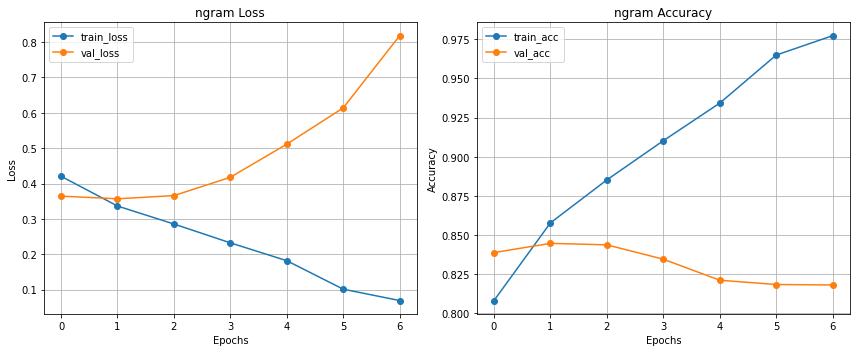

In [54]:
# 학습과정 그래프 출력
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_ngram.history['loss'], label='train_loss', marker='o')
plt.plot(history_ngram.history['val_loss'], label='val_loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ngram Loss')
plt.legend()
plt.grid(True)

# 정확도 (Accuracy) 그래프
plt.subplot(1, 2, 2)
plt.plot(history_ngram.history['accuracy'], label='train_acc', marker='o')
plt.plot(history_ngram.history['val_accuracy'], label='val_acc', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ngram Accuracy')
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [36]:
# 테스트 데이터 예측 결과 확인
predictions_ngram = model_ngram.predict(test_data_ngram)

# 출력 개수를 10개로 제한
for i, sentence in enumerate(test_data['document'][:10]):
    sentiment = "긍정" if predictions_ngram[i] > 0.5 else "부정"
    print(f"문장: {sentence}")
    print(f"예측 점수: {predictions_ngram[i][0]:.4f} => {sentiment}\n")

문장: 굳 ㅋ
예측 점수: 0.9988 => 긍정

문장: GDNTOPCLASSINTHECLUB
예측 점수: 0.6424 => 긍정

문장: 뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
예측 점수: 0.7890 => 긍정

문장: 지루하지는 않은데 완전 막장임... 돈주고 보기에는....
예측 점수: 0.0166 => 부정

문장: 3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
예측 점수: 0.0442 => 부정

문장: 음악이 주가 된, 최고의 음악영화
예측 점수: 0.9802 => 긍정

문장: 진정한 쓰레기
예측 점수: 0.0219 => 부정

문장: 마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다
예측 점수: 0.4832 => 부정

문장: 갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다
예측 점수: 0.0010 => 부정

문장: 이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..
예측 점수: 0.8856 => 긍정



In [37]:
# 테스트 데이터 평가
test_loss_ngram, test_accuracy_ngram = model_ngram.evaluate(test_data_ngram, test_labels)
print(f"테스트 손실: {test_loss_ngram:.4f}, 테스트 정확도: {test_accuracy_ngram:.4f}")

1563/1563 [==============================] - 3s 2ms/step - loss: 0.3673 - accuracy: 0.8406
테스트 손실: 0.3673, 테스트 정확도: 0.8406


In [38]:
# bpe 방식 사용을 위한 1D 합성곱 모델 정의
model_bpe = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_bpe.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# bpe 방식 학습
history_bpe = model_bpe.fit(
    train_data_bpe, train_labels_bpe,
    epochs=20,
    batch_size=2,
    validation_data=(val_data_bpe, val_labels_bpe),
    callbacks=callbacks
)

Epoch 1/20
59998/59998 [==============================] - 191s 3ms/step - loss: 0.4173 - accuracy: 0.8117 - val_loss: 0.3690 - val_accuracy: 0.8357
Epoch 2/20
59998/59998 [==============================] - 190s 3ms/step - loss: 0.3372 - accuracy: 0.8593 - val_loss: 0.3628 - val_accuracy: 0.8457
Epoch 3/20
59998/59998 [==============================] - 190s 3ms/step - loss: 0.2835 - accuracy: 0.8873 - val_loss: 0.3759 - val_accuracy: 0.8451
Epoch 4/20
59998/59998 [==============================] - 190s 3ms/step - loss: 0.2241 - accuracy: 0.9158 - val_loss: 0.4533 - val_accuracy: 0.8388
Epoch 5/20
59998/59998 [==============================] - 191s 3ms/step - loss: 0.1652 - accuracy: 0.9407 - val_loss: 0.5123 - val_accuracy: 0.8267

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/20
59998/59998 [==============================] - 192s 3ms/step - loss: 0.0858 - accuracy: 0.9710 - val_loss: 0.7681 - val_accuracy: 0.8179
Epoch 7/20
59998/59998 [=======

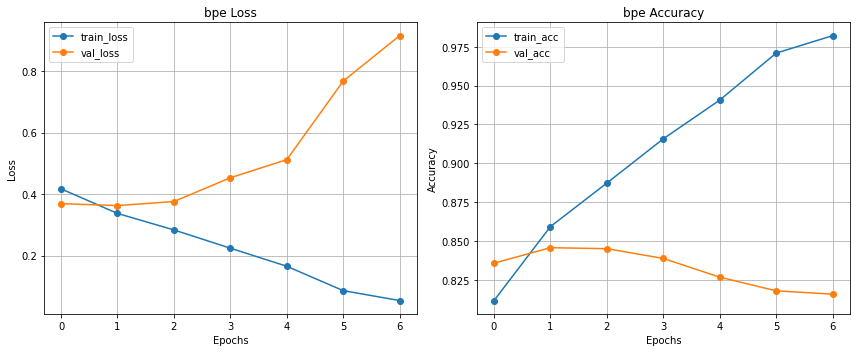

In [55]:
# 학습과정 그래프 출력
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_bpe.history['loss'], label='train_loss', marker='o')
plt.plot(history_bpe.history['val_loss'], label='val_loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('bpe Loss')
plt.legend()
plt.grid(True)

# 정확도 (Accuracy) 그래프
plt.subplot(1, 2, 2)
plt.plot(history_bpe.history['accuracy'], label='train_acc', marker='o')
plt.plot(history_bpe.history['val_accuracy'], label='val_acc', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('bpe Accuracy')
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [40]:
# 테스트 데이터 예측 결과 확인
predictions_bpe = model_bpe.predict(test_data_bpe)

# 출력 개수를 10개로 제한
for i, sentence in enumerate(test_data['document'][:10]):
    sentiment = "긍정" if predictions_bpe[i] > 0.5 else "부정"
    print(f"문장: {sentence}")
    print(f"예측 점수: {predictions_bpe[i][0]:.4f} => {sentiment}\n")

문장: 굳 ㅋ
예측 점수: 0.9894 => 긍정

문장: GDNTOPCLASSINTHECLUB
예측 점수: 0.5506 => 긍정

문장: 뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
예측 점수: 0.4325 => 부정

문장: 지루하지는 않은데 완전 막장임... 돈주고 보기에는....
예측 점수: 0.0000 => 부정

문장: 3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
예측 점수: 0.0678 => 부정

문장: 음악이 주가 된, 최고의 음악영화
예측 점수: 0.9779 => 긍정

문장: 진정한 쓰레기
예측 점수: 0.0007 => 부정

문장: 마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다
예측 점수: 0.0461 => 부정

문장: 갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다
예측 점수: 0.0001 => 부정

문장: 이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..
예측 점수: 0.6516 => 긍정



In [41]:
# 모델 평가
test_loss_bpe, test_accuracy_bpe = model_bpe.evaluate(test_data_bpe, test_labels)
print(f"테스트 손실: {test_loss_bpe:.4f}, 테스트 정확도: {test_accuracy_bpe:.4f}")

1563/1563 [==============================] - 3s 2ms/step - loss: 0.3677 - accuracy: 0.8418
테스트 손실: 0.3677, 테스트 정확도: 0.8418


#### 실험 환경
- 동일한 파라미터를 사용한 모델에서 토크나이징 방식을 ngram과 bpe로 나누어서 학습
- 기존 단어사전 크기를 8,000에서 5,000으로 감소시킴

In [42]:
# ngram 방식 + 5000개 단어사전 사용을 위한 1D 합성곱 모델 정의
model_ngram_5000 = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_ngram_5000.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
# ngram + 5000개 단어사전으로 학습
history_ngram_5000 = model_ngram_5000.fit(
    train_data_ngram, train_labels_ngram,
    epochs=20,
    batch_size=2,
    validation_data=(val_data_ngram, val_labels_ngram),
    callbacks=callbacks
)

Epoch 1/20
59998/59998 [==============================] - 192s 3ms/step - loss: 0.4470 - accuracy: 0.7926 - val_loss: 0.3983 - val_accuracy: 0.8145
Epoch 2/20
59998/59998 [==============================] - 192s 3ms/step - loss: 0.3856 - accuracy: 0.8301 - val_loss: 0.3906 - val_accuracy: 0.8224
Epoch 3/20
59998/59998 [==============================] - 190s 3ms/step - loss: 0.3454 - accuracy: 0.8514 - val_loss: 0.4142 - val_accuracy: 0.8226
Epoch 4/20
59998/59998 [==============================] - 190s 3ms/step - loss: 0.3041 - accuracy: 0.8725 - val_loss: 0.4339 - val_accuracy: 0.8178
Epoch 5/20
59998/59998 [==============================] - 190s 3ms/step - loss: 0.2628 - accuracy: 0.8937 - val_loss: 0.5086 - val_accuracy: 0.8137

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/20
59998/59998 [==============================] - 191s 3ms/step - loss: 0.1808 - accuracy: 0.9273 - val_loss: 0.6182 - val_accuracy: 0.8038
Epoch 7/20
59998/59998 [=======

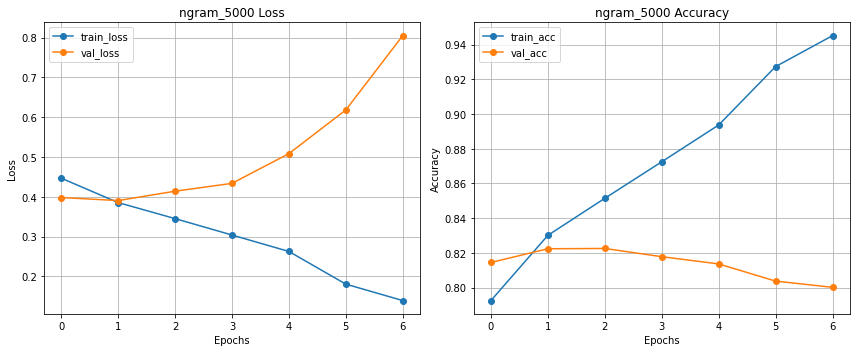

In [59]:
# 학습과정 그래프 출력
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_ngram_5000.history['loss'], label='train_loss', marker='o')
plt.plot(history_ngram_5000.history['val_loss'], label='val_loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ngram_5000 Loss')
plt.legend()
plt.grid(True)

# 정확도 (Accuracy) 그래프
plt.subplot(1, 2, 2)
plt.plot(history_ngram_5000.history['accuracy'], label='train_acc', marker='o')
plt.plot(history_ngram_5000.history['val_accuracy'], label='val_acc', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ngram_5000 Accuracy')
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [57]:
#  테스트 데이터로 예측
predictions_ngram_5000 = model_ngram_5000.predict(test_data_ngram)

for i, sentence in enumerate(test_data['document'][:10]):
    sentiment = "긍정" if predictions_ngram_5000[i] > 0.5 else "부정"
    print(f"문장: {sentence}")
    print(f"예측 점수: {predictions_ngram_5000[i][0]:.4f} => {sentiment}\n")

문장: 굳 ㅋ
예측 점수: 0.9909 => 긍정

문장: GDNTOPCLASSINTHECLUB
예측 점수: 0.7845 => 긍정

문장: 뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
예측 점수: 0.6433 => 긍정

문장: 지루하지는 않은데 완전 막장임... 돈주고 보기에는....
예측 점수: 0.0263 => 부정

문장: 3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
예측 점수: 0.1695 => 부정

문장: 음악이 주가 된, 최고의 음악영화
예측 점수: 0.9663 => 긍정

문장: 진정한 쓰레기
예측 점수: 0.0027 => 부정

문장: 마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다
예측 점수: 0.2794 => 부정

문장: 갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다
예측 점수: 0.0016 => 부정

문장: 이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..
예측 점수: 0.8434 => 긍정



In [60]:
# 모델 평가
test_loss_ngram, test_accuracy_ngram = model_ngram_5000.evaluate(test_data_ngram, test_labels)
print(f"테스트 손실: {test_loss_ngram:.4f}, 테스트 정확도: {test_accuracy_ngram:.4f}")

1563/1563 [==============================] - 3s 2ms/step - loss: 0.3980 - accuracy: 0.8178
테스트 손실: 0.3980, 테스트 정확도: 0.8178


In [61]:
# bpe 방식 + 5000개 단어사전 사용을 위한 1D 합성곱 모델 정의
model_bpe_5000 = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_bpe_5000.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
# bpe + 5000개 단어사전으로 학습
history_bpe_5000 = model_bpe_5000.fit(
    train_data_ngram, train_labels_ngram,
    epochs=20,
    batch_size=2,
    validation_data=(val_data_bpe, val_labels_bpe),
    callbacks=callbacks
)

Epoch 1/20
59998/59998 [==============================] - 192s 3ms/step - loss: 0.4439 - accuracy: 0.7916 - val_loss: 0.9760 - val_accuracy: 0.5031
Epoch 2/20
59998/59998 [==============================] - 190s 3ms/step - loss: 0.3809 - accuracy: 0.8321 - val_loss: 1.0609 - val_accuracy: 0.5036
Epoch 3/20
59998/59998 [==============================] - 192s 3ms/step - loss: 0.3426 - accuracy: 0.8544 - val_loss: 0.9968 - val_accuracy: 0.5035
Epoch 4/20
59998/59998 [==============================] - 191s 3ms/step - loss: 0.2996 - accuracy: 0.8762 - val_loss: 1.1049 - val_accuracy: 0.5048

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/20
59998/59998 [==============================] - 190s 3ms/step - loss: 0.2142 - accuracy: 0.9145 - val_loss: 1.2970 - val_accuracy: 0.5071
Epoch 6/20
59998/59998 [==============================] - 190s 3ms/step - loss: 0.1650 - accuracy: 0.9351 - val_loss: 1.7101 - val_accuracy: 0.5041


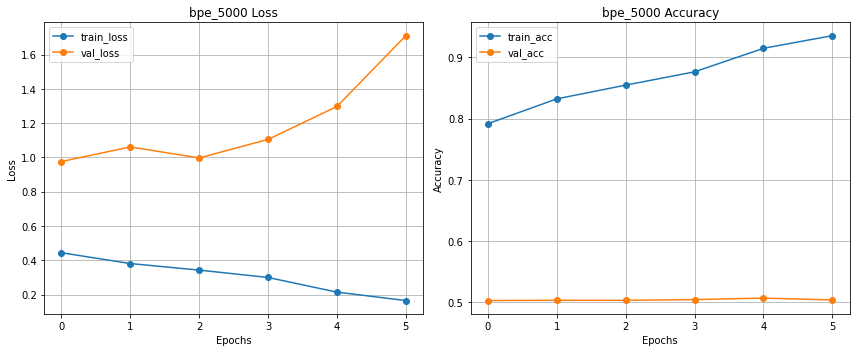

In [65]:
# 학습과정 그래프 출력
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_bpe_5000.history['loss'], label='train_loss', marker='o')
plt.plot(history_bpe_5000.history['val_loss'], label='val_loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('bpe_5000 Loss')
plt.legend()
plt.grid(True)

# 정확도 (Accuracy) 그래프
plt.subplot(1, 2, 2)
plt.plot(history_bpe_5000.history['accuracy'], label='train_acc', marker='o')
plt.plot(history_bpe_5000.history['val_accuracy'], label='val_acc', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('bpe_5000 Accuracy')
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [67]:
# 테스트 데이터 예측 결과 확인
predictions_bpe_5000 = model_bpe_5000.predict(test_data_bpe)

# 출력 개수를 10개로 제한
for i, sentence in enumerate(test_data['document'][:10]):
    sentiment = "긍정" if predictions_bpe_5000[i] > 0.5 else "부정"
    print(f"문장: {sentence}")
    print(f"예측 점수: {predictions_bpe_5000[i][0]:.4f} => {sentiment}\n")

문장: 굳 ㅋ
예측 점수: 0.5839 => 긍정

문장: GDNTOPCLASSINTHECLUB
예측 점수: 0.4252 => 부정

문장: 뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
예측 점수: 0.9822 => 긍정

문장: 지루하지는 않은데 완전 막장임... 돈주고 보기에는....
예측 점수: 0.7974 => 긍정

문장: 3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
예측 점수: 0.2353 => 부정

문장: 음악이 주가 된, 최고의 음악영화
예측 점수: 0.5359 => 긍정

문장: 진정한 쓰레기
예측 점수: 0.3767 => 부정

문장: 마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다
예측 점수: 0.4197 => 부정

문장: 갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다
예측 점수: 0.8299 => 긍정

문장: 이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..
예측 점수: 0.4500 => 부정



In [68]:
# 모델 평가
test_loss_bpe, test_accuracy_bpe = model_bpe_5000.evaluate(test_data_bpe, test_labels)
print(f"테스트 손실: {test_loss_bpe:.4f}, 테스트 정확도: {test_accuracy_bpe:.4f}")

1563/1563 [==============================] - 3s 2ms/step - loss: 0.9585 - accuracy: 0.5148
테스트 손실: 0.9585, 테스트 정확도: 0.5148


### 테스트 결과

#### ngram 방식 + 단어집합 수 8,000
- 2번째 에포크, 훈련 정확도 : 0.8577, 검증 정확도 : 0.8447, 테스트 정확도 : 0.8406

#### bpe 방식 + 단어집합 수 8,000
- 2번째 에포크, 훈련 정확도 : 0.8593, 검증 정확도 : 0.8457, 테스트 정확도 : 0.8418

#### ngram 방식 + 단어집합 수 5,000
- 3번째 에포크, 훈련 정확도 : 0.8514, 검증 정확도 : 0.8226, 테스트 정확도 : 0.8178

#### bpe 방식 + 단어집합 수 5,000
- 5번째 에포크, 훈련 정확도 : 0.8577, 검증 정확도 : 0.8447, 테스트 정확도 : 0.5148

### 결론

- bpe방식에 상대적으로 적은 5,000개의 단어집합을 사용한 모델은 검증정확도 기준 5번째 에포크에서 최고 성능이 나타났음
- 나머지 모델들(ngram+8,000, bpe+8000, ngram+5000) 모두 검증 정확도 기준 2~3 에포크에서 최고 성능이 나타남
- ngram방식은 단어집합의 개수 변화에 영향을 덜 받음(테스트 정확도 기준, 0.8406 -> 0.8178)
- bpe방식은 단어집합 개수 변화에 큰 영향을 받음(테스트 정확도 기준, 0.8418 -> 0.5148)
##### - 학습데이터의 단어 집합이 적은 경우 ngram 방식을 사용하는 것이 유리할 것으로 보임

#### 
- 학습된 단어사전에 의미없는 1단어 문자도 존재함(인덱스 7436~). 미리 확인하고 단어집합 수를 정하는 것이 모델 성능에 도움이 될듯
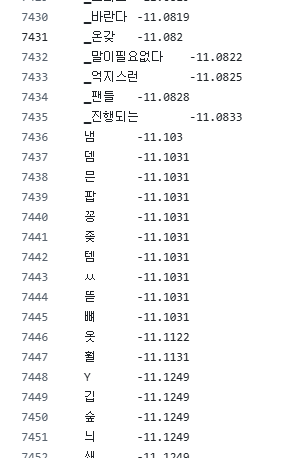